In [3]:
from configs.configSecrets import ConfigSecrets
# https://github.com/alpacahq/alpaca-py#data-api-example
# https://alpaca.markets/docs/python-sdk/index.html
# seperate, maybe try https://python-poetry.org/
%load_ext autoreload
%autoreload 2
API_KEY = ConfigSecrets.ALPACA_API_KEY #os.environ['API_KEY']
API_SECRET = ConfigSecrets.ALPACA_API_SECRET #os.environ['API_SECRET']
BASE_URL = "https://paper-api.alpaca.markets"
from alpaca.data import CryptoHistoricalDataClient, StockHistoricalDataClient
from alpaca.data import CryptoLatestQuoteRequest
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime
from alpaca.trading import GetAssetsRequest, AssetClass
from alpaca.trading.client import TradingClient
import datetime
import dateutil.relativedelta
from configs.config import Config


In [37]:
from common.polygonDownloader import downloadMonthHourly

latest = downloadMonthHourly(['X:BTCUSD'])

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [4]:
latest.data['X:BTCUSD']

,Open,High,Low,Close,Volume,Trade count,VWAP
Open time,,,,,,,
2023-04-20 00:00:00+00:00,28809.00,28973.00,28728.90,28931.09,897.921806,25613,28853.7015
2023-04-20 01:00:00+00:00,28931.09,29009.33,28847.72,28946.24,837.807899,17536,28934.6702
2023-04-20 02:00:00+00:00,28940.20,28973.74,28729.83,28759.72,667.655451,15736,28871.6728
2023-04-20 03:00:00+00:00,28759.71,28897.70,28556.87,28878.61,864.289727,17601,28763.5041
2023-04-20 04:00:00+00:00,28861.30,28972.33,28858.54,28882.89,587.568587,13258,28923.7955
...,...,...,...,...,...,...,...
2023-05-20 21:00:00+00:00,27024.15,27077.00,26974.40,27045.41,295.752932,10489,27022.9200
2023-05-20 22:00:00+00:00,27045.67,27087.00,27017.00,27079.82,149.672387,8032,27050.3677
2023-05-20 23:00:00+00:00,27077.40,27154.00,27055.20,27140.00,452.158818,9400,27101.5233


In [5]:
from common.featuresTargetsUnshiftedMaker import FeaturesTargetsUnshiftedMaker
from pandas import DataFrame
from configs.featuresShiftedConfig import FeaturesShiftedConfig

#symbolBarData:LocalDataT =  vbt.HDFData.fetch(downloadPath)
#config =FeaturesShiftedConfig(dirStr)
#featureDataShifted = createFeatureDataShifted(symbol, config, symbolBarData)
featuresTargetsMaker: FeaturesTargetsUnshiftedMaker = FeaturesTargetsUnshiftedMaker()
featuresTargetsUnshifted: DataFrame = featuresTargetsMaker.loadData(latest, 'X:BTCUSD')
featuresTargetsUnshifted

DATA SHAPE (746,)
DATA type <class 'tuple'>
taData shape (746, 179)


,Open,High,Low,Close,Volume,Trade count,VWAP,ad_real,add_real,adosc_real,...,outWQA99,outWQA101,longEntry10,shortEntry10,longEntry20,shortEntry20,longEntry50,shortEntry50,longEntry100,shortEntry100
Open time,,,,,,,,,,,,,,,,,,,,,
2023-04-20 00:00:00+00:00,28809.00,28973.00,28728.90,28931.09,897.921806,25613,28853.7015,589.589951,57701.90,NaN,...,0,0.500162,False,False,False,False,False,False,False,False
2023-04-20 01:00:00+00:00,28931.09,29009.33,28847.72,28946.24,837.807899,17536,28934.6702,773.263819,57857.05,NaN,...,0,0.093744,False,True,False,True,False,True,False,True
2023-04-20 02:00:00+00:00,28940.20,28973.74,28729.83,28759.72,667.655451,15736,28871.6728,269.244311,57703.57,NaN,...,0,-0.739942,False,True,False,False,False,False,False,False
2023-04-20 03:00:00+00:00,28759.71,28897.70,28556.87,28878.61,864.289727,17601,28763.5041,1036.715737,57454.57,NaN,...,0,0.348853,False,False,False,False,False,False,False,False
2023-04-20 04:00:00+00:00,28861.30,28972.33,28858.54,28882.89,587.568587,13258,28923.7955,700.615558,57830.87,NaN,...,0,0.189734,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-20 21:00:00+00:00,27024.15,27077.00,26974.40,27045.41,295.752932,10489,27022.9200,-4532.401393,54051.40,39.309704,...,0,0.207210,False,False,False,False,False,False,False,False
2023-05-20 22:00:00+00:00,27045.67,27087.00,27017.00,27079.82,149.672387,8032,27050.3677,-4413.433227,54104.00,81.087900,...,0,0.487850,False,False,False,False,False,False,False,False
2023-05-20 23:00:00+00:00,27077.40,27154.00,27055.20,27140.00,452.158818,9400,27101.5233,-4089.416584,54209.20,193.903557,...,0,0.633597,False,False,False,False,False,False,False,False


In [6]:
from common.featurePreparer import FeaturePreparer

featureMaker = FeaturePreparer()
featureDataShifted = featureMaker.makeFeatureDf(featuresTargetsUnshifted)


cols to shift 254 soemthing 254 shape (746, 263)
Index([], dtype='object')
ZErOS
['cdl2crows_integer', 'cdl3blackcrows_integer', 'cdl3starsinsouth_integer', 'cdl3whitesoldiers_integer', 'cdlabandonedbaby_integer', 'cdlbreakaway_integer', 'cdlconcealbabyswall_integer', 'cdlcounterattack_integer', 'cdldarkcloudcover_integer', 'cdlidentical3crows_integer', 'cdlinneck_integer', 'cdlkicking_integer', 'cdlkickingbylength_integer', 'cdlladderbottom_integer', 'cdlmathold_integer', 'cdlmorningdojistar_integer', 'cdlonneck_integer', 'cdlpiercing_integer', 'cdlrisefall3methods_integer', 'cdlstalledpattern_integer', 'cdlsticksandwich_integer', 'cdlthrusting_integer', 'cdltristar_integer', 'cdlunique3river_integer', 'cdlupsidegap2crows_integer', 'outWQA61', 'outWQA62', 'outWQA64', 'outWQA65', 'outWQA68', 'outWQA74', 'outWQA75', 'outWQA81', 'outWQA95', 'outWQA99']
Zeros length 35
TO REMOVE
['cdl3starsinsouth_integer', 'cdlabandonedbaby_integer', 'cdlconcealbabyswall_integer', 'cdlkicking_integer', '

In [7]:
featureDataShifted

,CurrentOpen,Open,High,Low,Close,Volume,Trade count,VWAP,ad_real,add_real,...,wma_real,outWQA1,longEntry10,shortEntry10,longEntry20,shortEntry20,longEntry50,shortEntry50,longEntry100,shortEntry100
Open time,,,,,,,,,,,,,,,,,,,,,
2023-04-20 01:00:00+00:00,28931.09,28809.00,28973.00,28728.90,28931.09,897.921806,25613.0,28853.7015,589.589951,57701.90,...,27973.035700,0.5,0,1,0,1,0,1,0,1
2023-04-20 02:00:00+00:00,28940.20,28931.09,29009.33,28847.72,28946.24,837.807899,17536.0,28934.6702,773.263819,57857.05,...,27973.035700,0.5,0,1,0,0,0,0,0,0
2023-04-20 03:00:00+00:00,28759.71,28940.20,28973.74,28729.83,28759.72,667.655451,15736.0,28871.6728,269.244311,57703.57,...,27973.035700,0.5,0,0,0,0,0,0,0,0
2023-04-20 04:00:00+00:00,28861.30,28759.71,28897.70,28556.87,28878.61,864.289727,17601.0,28763.5041,1036.715737,57454.57,...,27973.035700,0.5,0,0,0,0,0,0,0,0
2023-04-20 05:00:00+00:00,28883.90,28861.30,28972.33,28858.54,28882.89,587.568587,13258.0,28923.7955,700.615558,57830.87,...,27973.035700,0.5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-20 21:00:00+00:00,27024.15,27075.38,27106.00,27006.60,27025.00,197.956593,9404.0,27057.9654,-4646.032783,54112.60,...,26938.956366,0.5,0,0,0,0,0,0,0,0
2023-05-20 22:00:00+00:00,27045.67,27024.15,27077.00,26974.40,27045.41,295.752932,10489.0,27022.9200,-4532.401393,54051.40,...,26947.556301,0.5,0,0,0,0,0,0,0,0
2023-05-20 23:00:00+00:00,27077.40,27045.67,27087.00,27017.00,27079.82,149.672387,8032.0,27050.3677,-4413.433227,54104.00,...,26958.040430,0.5,0,0,0,0,0,0,0,0


In [8]:
closeSeries = featureDataShifted.Close
from common.hourlyReturns import HourlyReturns
returnMaker = HourlyReturns(closeSeries)
returns = returnMaker.createHourlyReturns()
sequence = list(range(1, Config.hourlyReturnsWindowSize+1))

npReturns = returns.loc[:, sequence].values.reshape(-1, Config.hourlyReturnsWindowSize , 1)

In [9]:
import pandas as pd
from common.predict import Predict
testFeatures = featureDataShifted.loc[:, Config.featuresColumnStart:Config.featuresColumnEnd]
testTargets = featureDataShifted.loc[:, Config.targetsColumnStart:Config.targetsColumnEnd]
#testTargets['fwd_returns_label'] = featureDataShifted['fwd_returns_label']
print(type(testFeatures))
print(type(returns))
testFeatures= testFeatures[testFeatures.index.isin(returns.index)]
testTargets= testTargets[testTargets.index.isin(returns.index)]

#result = pd.merge(left, right, on="B", how="outer")
#testFeatures
#returns

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:

predictor = Predict("longEntry50", "shortEntry50",
                    npReturns, testFeatures, testTargets)
predictor.runPredicts()
comparison = predictor.createComparisonDf()


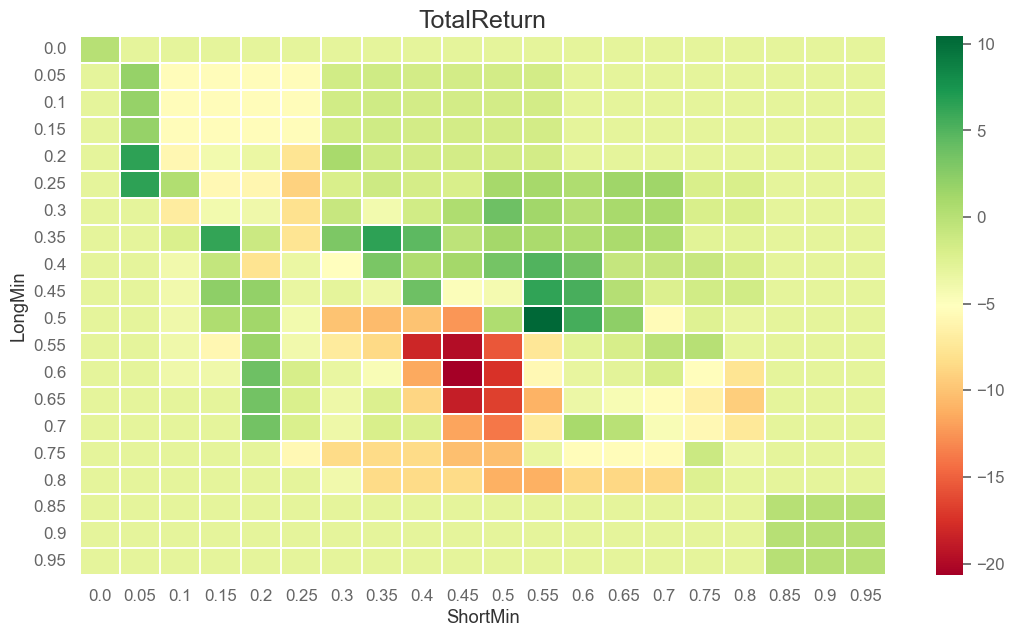

In [132]:
from common.modelTester import ModelTester
closes = latest.data['X:BTCUSD'].Close
modelTester = ModelTester()
portfolioStats = modelTester.createPortfolioComparisonDf(closes, comparison, 50)
modelTester.createMinScoreHistogram(portfolioStats, 'TotalReturn')

In [133]:
comparison

,predictedLongEntry,predictedShortEntry,actualLongEntry,actualShortEntry,predictedLongEntry_0.0,predictedShortEntry_0.0,predictedLongEntry_0.05,predictedShortEntry_0.05,predictedLongEntry_0.1,predictedShortEntry_0.1,...,predictedLongEntry_0.75,predictedShortEntry_0.75,predictedLongEntry_0.8,predictedShortEntry_0.8,predictedLongEntry_0.85,predictedShortEntry_0.85,predictedLongEntry_0.9,predictedShortEntry_0.9,predictedLongEntry_0.95,predictedShortEntry_0.95
Open time,,,,,,,,,,,,,,,,,,,,,
2023-04-25 02:00:00+00:00,0.376911,0.275245,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2023-04-25 03:00:00+00:00,0.441434,0.357340,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2023-04-25 04:00:00+00:00,0.464558,0.308808,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2023-04-25 05:00:00+00:00,0.444817,0.322424,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2023-04-25 06:00:00+00:00,0.549323,0.313354,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-20 21:00:00+00:00,0.534752,0.523475,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2023-05-20 22:00:00+00:00,0.560564,0.433030,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2023-05-20 23:00:00+00:00,0.615910,0.431967,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [135]:

portfolioStats
best=portfolioStats.loc[portfolioStats['TotalReturn'].idxmax()]
#df2=df.loc[df['Fee'].idxmax()]
longMin=best['LongMin']
shortMin=best['ShortMin']
print(longMin)
print(shortMin)

0.5
0.55


In [41]:

#pd.concat([testFeatures.head(10), testFeatures.tail(10)])
#pd.concat([returns.head(10), returns.tail(10)])


In [28]:
recentHour = comparison.iloc[-1:, :]
recentHour

,predictedLongEntry,predictedShortEntry,actualLongEntry,actualShortEntry,predictedLongEntry_0.0,predictedShortEntry_0.0,predictedLongEntry_0.05,predictedShortEntry_0.05,predictedLongEntry_0.1,predictedShortEntry_0.1,...,predictedLongEntry_0.75,predictedShortEntry_0.75,predictedLongEntry_0.8,predictedShortEntry_0.8,predictedLongEntry_0.85,predictedShortEntry_0.85,predictedLongEntry_0.9,predictedShortEntry_0.9,predictedLongEntry_0.95,predictedShortEntry_0.95
Open time,,,,,,,,,,,,,,,,,,,,,
2023-05-21 01:00:00+00:00,0.692644,0.462128,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
if recentHour.iloc[0]['predictedLongEntry']> longMin:
    print("should buy")

if recentHour.iloc[0]['predictedShortEntry'] > shortMin:
    print("should short")
#comparison.tail()

should buy


In [31]:
recentHour.iloc[0]['predictedLongEntry']

0.6926440000534058

In [34]:
import numpy as np

trainLaggedReturns = np.load(Config.relativeTrainLaggedReturnsPath)
trainLaggedReturns.shape

(38590, 120, 1)

In [42]:
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime

# no keys required for crypto data
client = CryptoHistoricalDataClient()

request_params = CryptoBarsRequest(
    symbol_or_symbols=["BTC/USD"],
    timeframe=TimeFrame.Hour,
    start=datetime(2023, 5, 1)
)

bars = client.get_crypto_bars(request_params)
bars.df.tail(10)

open          high       low     close  \
symbol  timestamp                                                               
BTC/USD 2023-05-21 11:00:00+00:00  26972.67  26972.670000  26805.00  26852.24   
        2023-05-21 12:00:00+00:00  26850.97  26971.190000  26827.50  26955.00   
        2023-05-21 13:00:00+00:00  26954.99  26974.810886  26910.07  26910.07   
        2023-05-21 14:00:00+00:00  26910.90  27005.149580  26907.59  26927.99   
        2023-05-21 15:00:00+00:00  26926.25  27006.050000  26829.59  26919.29   
        2023-05-21 16:00:00+00:00  26918.53  26944.530000  26875.00  26907.28   
        2023-05-21 17:00:00+00:00  26905.41  26956.400000  26850.10  26893.99   
        2023-05-21 18:00:00+00:00  26893.99  26919.600000  26864.42  26893.00   
        2023-05-21 19:00:00+00:00  26890.65  26943.280000  26882.98  26933.92   
        2023-05-21 20:00:00+00:00  26932.72  26954.420000  26919.61  26932.64   

                                       volume  trade_count          vwap  
symbol  timestamp                                                         
BTC/USD 2023-05-21 11:00:00+00:00  123.066332       5408.0  26893.880677  
        2023-05-21 12:00:00+00:00   75.294329       3203.0  26887.620607  
        2023-05-21 13:00:00+00:00   29.891345       1208.0  26937.180366  
        2023-05-21 14:00:00+00:00   54.215263       2202.0  26964.514882  
        2023-05-21 15:00:00+00:00   85.681270       2752.0  26914.752825  
        2023-05-21 16:00:00+00:00   53.514350       1839.0  26908.221386  
        2023-05-21 17:00:00+00:00   60.256400       2125.0  26897.574990  
        2023-05-21 18:00:00+00:00   43.945426       1454.0  26889.169609  
        2023-05-21 19:00:00+00:00   34.869548       1099.0  26913.667848  
        2023-05-21 20:00:00+00:00   10.317760        593.0  26935.029606

In [43]:
latest.data['X:BTCUSD'].tail(10)


,Open,High,Low,Close,Volume,Trade count,VWAP
Open time,,,,,,,
2023-05-21 11:00:00+00:00,26963.64,26963.64,26792.54,26843.00,968.372835,13203,26888.4742
2023-05-21 12:00:00+00:00,26836.30,26962.00,26812.00,26943.26,440.873330,9939,26876.1132
2023-05-21 13:00:00+00:00,26942.41,26956.00,26896.90,26901.21,138.497653,5819,26929.7756
2023-05-21 14:00:00+00:00,26901.19,26985.35,26887.30,26910.55,211.438020,7677,26939.0207
2023-05-21 15:00:00+00:00,26910.25,26992.16,26815.50,26909.10,409.912773,10673,26903.1353
2023-05-21 16:00:00+00:00,26913.51,26939.00,26848.80,26896.23,268.466702,9487,26898.8323
2023-05-21 17:00:00+00:00,26890.00,26951.00,26840.60,26880.65,326.104102,10335,26892.9005
2023-05-21 18:00:00+00:00,26880.56,26909.00,26847.50,26880.37,181.864546,8298,26878.7731
2023-05-21 19:00:00+00:00,26879.70,26934.00,26869.80,26909.63,270.195894,9161,26900.3450


In [4]:
from alpaca.broker import TradeAccount
from alpaca.trading.client import TradingClient
trading_client = TradingClient(API_KEY, API_SECRET, paper=True)
account: TradeAccount = trading_client.get_account()
# https://alpaca.markets/docs/python-sdk/trading.html#getting-all-positions
trading_client.get_all_positions()

[{   'asset_class': <AssetClass.CRYPTO: 'crypto'>,
     'asset_id': UUID('64bbff51-59d6-4b3c-9351-13ad85e3c752'),
     'asset_marginable': False,
     'avg_entry_price': '26911.625279138',
     'avg_entry_swap_rate': None,
     'change_today': '0.0115353320847914',
     'cost_basis': '9497.716565526',
     'current_price': '26741.12',
     'exchange': <AssetExchange.CRYPTO: 'CRYPTO'>,
     'lastday_price': '26436.17',
     'market_value': '9437.54142569728',
     'qty': '0.352922444',
     'qty_available': '0',
     'side': <PositionSide.LONG: 'long'>,
     'swap_rate': None,
     'symbol': 'BTCUSD',
     'unrealized_intraday_pl': '107.6236992978',
     'unrealized_intraday_plpc': '0.0115353320847914',
     'unrealized_pl': '-60.17513982872',
     'unrealized_plpc': '-0.0063357481151984',
     'usd': None}]

In [57]:
from alpaca.data import CryptoSnapshotRequest, Snapshot
from alpaca.trading.requests import MarketOrderRequest, StopLossRequest, TakeProfitRequest
from alpaca.trading.enums import OrderSide, TimeInForce, OrderClass, OrderType

#https://alpaca.markets/docs/trading/getting_started/how-to-orders/
symbol= "BTC/USD"
#symbol = 'AAPL'
#symbol_bars = api.get_barset(symbol, 'minute', 1).df.iloc[0]
#symbol_price = symbol_bars[symbol]['close']
client = CryptoHistoricalDataClient()

snapshot:Snapshot = client.get_crypto_snapshot(CryptoSnapshotRequest(symbol_or_symbols="BTC/USD"))


26753.54

In [111]:

symbol_price = snapshot[symbol].minute_bar.close

stopLossRequest = StopLossRequest(stop_price= symbol_price * .97)
takeProfitRequest = TakeProfitRequest(limit_price= symbol_price * 1.3)

market_order_data = MarketOrderRequest(
    symbol='BTC/USD',
    #qty=0.023,
    notional=10000,
    side=OrderSide.BUY,
    time_in_force=TimeInForce.GTC,
    #order_class=OrderClass.,
    type=OrderType.MARKET,
    #stop_loss=stopLossRequest,
    #take_profit=takeProfitRequest,
    #client_order_id="first_algo"
)

market_order = trading_client.submit_order(
    order_data=market_order_data
)

In [112]:
market_order

{   'asset_class': <AssetClass.CRYPTO: 'crypto'>,
    'asset_id': UUID('276e2673-764b-4ab6-a611-caf665ca6340'),
    'canceled_at': None,
    'client_order_id': '347ab07a-afd8-4582-9c90-30910e4dc3dc',
    'created_at': datetime.datetime(2023, 5, 22, 21, 56, 38, 110133, tzinfo=datetime.timezone.utc),
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': UUID('bffe1443-a7ca-463e-b44f-0c4a1d3890cf'),
    'legs': None,
    'limit_price': None,
    'notional': '10000',
    'order_class': <OrderClass.SIMPLE: 'simple'>,
    'order_type': <OrderType.MARKET: 'market'>,
    'qty': None,
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': <OrderSide.BUY: 'buy'>,
    'status': <OrderStatus.PENDING_NEW: 'pending_new'>,
    'stop_price': None,
    'submitted_at': datetime.datetime(2023, 5, 22, 21, 56, 38, 109581, tzinfo=datetime.timezone.utc),
  

In [113]:
filled = trading_client.get_order_by_id(market_order.id)
filled

{   'asset_class': <AssetClass.CRYPTO: 'crypto'>,
    'asset_id': UUID('276e2673-764b-4ab6-a611-caf665ca6340'),
    'canceled_at': None,
    'client_order_id': '347ab07a-afd8-4582-9c90-30910e4dc3dc',
    'created_at': datetime.datetime(2023, 5, 22, 21, 56, 38, 110133, tzinfo=datetime.timezone.utc),
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': datetime.datetime(2023, 5, 22, 21, 56, 38, 111351, tzinfo=datetime.timezone.utc),
    'filled_avg_price': '26911.625279162',
    'filled_qty': '0.353806962',
    'hwm': None,
    'id': UUID('bffe1443-a7ca-463e-b44f-0c4a1d3890cf'),
    'legs': None,
    'limit_price': None,
    'notional': '10000',
    'order_class': <OrderClass.SIMPLE: 'simple'>,
    'order_type': <OrderType.MARKET: 'market'>,
    'qty': None,
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': <OrderSide.BUY: 'buy'>,
    'status': <OrderStatus.FILLED: 'filled'>,
    'stop_price': None,
    'submitted_

In [114]:
filled.filled_qty


'0.353806962'

In [95]:
'''from alpaca.trading import StopOrderRequest

#https://alpaca.markets/docs/python-sdk/api_reference/trading/requests.html#stoporderrequest
stopOrderRequest: StopOrderRequest  =StopOrderRequest(symbol=symbol, qty=filled.filled_qty,
                                                      side=OrderSide.SELL,
                                                      type=OrderType.STOP,
                                                      time_in_force=TimeInForce.GTC,
                                                      stop_price= symbol_price * .97)
stopOrder = trading_client.submit_order(
    order_data=stopOrderRequest
)'''

APIError: {"code":40010001,"message":"invalid order type for crypto order"}

In [129]:
from alpaca.trading import StopLimitOrderRequest
qty = trading_client.get_open_position("BTCUSD").qty
stopOrderRequest: StopLimitOrderRequest  =StopLimitOrderRequest(symbol=symbol, qty=qty,
                                                      side=OrderSide.SELL,
                                                      type=OrderType.STOP,
                                                      time_in_force=TimeInForce.GTC,
                                                      stop_price= symbol_price * .97,
                                                        limit_price = symbol_price *1.05)
stopOrder = trading_client.submit_order(
    order_data=stopOrderRequest
)

In [130]:
stopOrder

{   'asset_class': <AssetClass.CRYPTO: 'crypto'>,
    'asset_id': UUID('276e2673-764b-4ab6-a611-caf665ca6340'),
    'canceled_at': None,
    'client_order_id': '4f6241f2-7fc5-4251-81a6-def26672d0e9',
    'created_at': datetime.datetime(2023, 5, 22, 22, 2, 12, 717750, tzinfo=datetime.timezone.utc),
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': UUID('4c837941-0da3-4a7b-97ca-1dece2974724'),
    'legs': None,
    'limit_price': '28091.217',
    'notional': None,
    'order_class': <OrderClass.SIMPLE: 'simple'>,
    'order_type': <OrderType.STOP_LIMIT: 'stop_limit'>,
    'qty': '0.352922444',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': <OrderSide.SELL: 'sell'>,
    'status': <OrderStatus.NEW: 'new'>,
    'stop_price': '25950.9338',
    'submitted_at': datetime.datetime(2023, 5, 22, 22, 2, 12, 716674, tzinfo=datetime.time

In [131]:
symbol_price = snapshot[symbol].minute_bar.close
symbol_price

26753.54

In [122]:
from alpaca.trading import Position
from typing import List

positions: List[Position] = trading_client.get_all_positions()
for position in positions:
    print(" symbol: " + position.symbol +  " " + position.side + " " + position.qty)


 symbol: BTCUSD long 0.352922444


In [123]:
#trading_client.close_all_positions(cancel_orders=True)


In [124]:
symbol_price = snapshot[symbol].minute_bar.close
symbol_price

26753.54

In [ ]:

''''
limit_order_data = LimitOrderRequest(
    symbol="BTC/USD",
    limit_price=symbol_price,
    notional=4000,
    side=OrderSide.SELL,
    time_in_force=TimeInForce.FOK
)

# Limit order
limit_order = trading_client.submit_order(
    order_data=limit_order_data
)'''


In [128]:
qty = trading_client.get_open_position("BTCUSD").qty


'0.352922444'

In [6]:
from alpaca.trading import AssetExchange, PositionSide, Position

currentPosition: Position = trading_client.get_open_position('BTCUSD')#.qty
unrealizedPnlPercent: str = currentPosition.unrealized_plpc
exchange: AssetExchange = currentPosition.exchange
positionSymbol: str = currentPosition.symbol
side: PositionSide = currentPosition.side
quantity: str = currentPosition.qty


In [11]:
side

<PositionSide.LONG: 'long'>